## Търсене и извличане на информация. Приложение на дълбоко машинно обучение
> ### Стоян Михов
> #### Зимен семестър 2021/2022

### Упражнение 4

 За да работи програмата трябва корпуса от публицистични текстове за Югоизточна Европа,
 да се намира разархивиран в директорията, в която е програмата (виж упражнение 2).

 Преди да се стартира програмата е необходимо да се активира съответното обкръжение с командата: `conda activate tii`

In [1]:
import nltk
from nltk.corpus import PlaintextCorpusReader
import sys

##### Следващите няколко функции са идентични с тези от Упражнение 3

In [2]:
class progressBar:
    def __init__(self ,barWidth = 50):
        self.barWidth = barWidth
        self.period = None
    def start(self, count):
        self.period = int(count / self.barWidth)
        sys.stdout.write("["+(" " * self.barWidth)+"]")
        sys.stdout.flush()
        sys.stdout.write("\b" * (self.barWidth+1))
    def tick(self, item):
        if item>0 and item % self.period == 0:
            sys.stdout.write("-")
            sys.stdout.flush()
    def stop(self):
        sys.stdout.write("]\n")

In [78]:
def printDocuments(myCorpus,fileNames,docIDs):
    for docID, score in docIDs:
        text = myCorpus.words(fileNames[docID])
        print(f'Document ID: {docID} Score: {score}')
        for word in text:
            print(word,end=' ')
        print('\n')

In [3]:
corpus_root = '../JOURNALISM.BG/C-MassMedia'
myCorpus = PlaintextCorpusReader(corpus_root, '.*\.txt')
fileNames = myCorpus.fileids()

In [4]:
classesSet = set( [ file[:file.find('/')] for file in fileNames ] )
classes = sorted(list(classesSet - {'Z','D-Society'}))

In [8]:
classes

['C-Culture', 'E-Economy', 'J-Politics', 'S-Military']

In [5]:
fullClassCorpus = [ [ myCorpus.words(file) for file in fileNames if file.find(c+'/')==0 ] for c in classes ];fullClassCorpus

[[['Културен', 'обзор', '30', '/', '10', '/', '2002', ...],
  ['Културен', 'преглед', '06', '/', '11', '/', '2002', ...],
  ['Културен', 'обзор', '13', '/', '11', '/', '2002', ...],
  ['Културен', 'обзор', '20', '/', '11', '/', '2002', ...],
  ['Културен', 'обзор', '27', '/', '11', '/', '2002', ...],
  ['Културен', 'обзор', '04', '/', '12', '/', '2002', ...],
  ['Културен', 'преглед', '11', '/', '12', '/', '2002', ...],
  ['Културен', 'преглед', '18', '/', '12', '/', '2002', ...],
  ['Културен', 'преглед', '26', '/', '12', '/', '2002', ...],
  ['Културен', 'преглед', '08', '/', '01', '/', '2003', ...],
  ['Културен', 'обзор', '15', '/', '01', '/', '2003', ...],
  ['Културен', 'преглед', '22', '/', '01', '/', '2003', ...],
  ['Културен', 'преглед', '29', '/', '01', '/', '2003', ...],
  ['Културен', 'преглед', '05', '/', '02', '/', '2003', ...],
  ['Културен', 'преглед', '12', '/', '02', '/', '2003', ...],
  ['Културен', 'обзор', '19', '/', '02', '/', '2003', ...],
  ['Културен', 'обзор'

In [6]:
import random

def splitClassCorpus(fullClassCorpus, testFraction = 0.1):
    testClassCorpus = []
    trainClassCorpus = []
    random.seed(42)
    for c in range(len(fullClassCorpus)):
        classList = fullClassCorpus[c]
        random.shuffle(classList)
        testCount = int(len(classList) * testFraction)
        testClassCorpus.append(classList[:testCount])
        trainClassCorpus.append(classList[testCount:])
    return testClassCorpus, trainClassCorpus

In [7]:
testClassCorpus, trainClassCorpus = splitClassCorpus(fullClassCorpus)

In [9]:
import math

def trainBernoulliNB(trainClassCorpus):
    N = sum(len(classList) for classList in trainClassCorpus)
    classesCount = len(trainClassCorpus)
    pb = progressBar(50)
    pb.start(N)
    V = {}
    i=0
    for c in range(classesCount):
        for text in trainClassCorpus[c]:
            pb.tick(i)
            i += 1
            terms = set([ token.lower() for token in text if token.isalpha() ] )
            for term in terms:
                if term not in V:
                    V[term] = [0] * classesCount
                V[term][c] += 1
    pb.stop()

    Nc = [ len(classList) for classList in trainClassCorpus ]
    prior = [ Nc[c] / N for c in range(classesCount) ]
    condProb = {}
    for t in V:
        condProb[t] = [ (V[t][c] +1) / (Nc[c] + 2) for c in range(classesCount)]
    return condProb, prior, V

In [10]:
condProbB, priorB, VB = trainBernoulliNB(trainClassCorpus)

[                                                  --------------------------------------------------]


In [11]:
VB

{'възстановяване': [23, 57, 48, 11],
 'турнирът': [7, 0, 1, 0],
 'италия': [92, 26, 117, 28],
 'бъдат': [123, 177, 1307, 235],
 'домакини': [11, 1, 4, 2],
 'хилендарски': [1, 0, 0, 0],
 'три': [78, 67, 421, 80],
 'спортистка': [7, 0, 0, 0],
 'г': [242, 291, 1708, 662],
 'бофрост': [1, 0, 0, 0],
 'съюз': [8, 28, 710, 19],
 'представен': [13, 5, 57, 10],
 'завърши': [88, 20, 167, 37],
 'гьоте': [9, 0, 0, 0],
 'оператор': [4, 20, 14, 1],
 'дискутират': [1, 1, 2, 0],
 'добрата': [7, 5, 19, 2],
 'ноември': [60, 47, 849, 175],
 'българия': [200, 140, 582, 105],
 'златното': [3, 0, 0, 0],
 'обявена': [11, 7, 26, 3],
 'организации': [15, 15, 183, 20],
 'босна': [200, 125, 863, 462],
 'комеага': [1, 0, 0, 0],
 'обзор': [110, 15, 1, 0],
 'разпространяване': [2, 1, 3, 1],
 'софия': [104, 51, 436, 67],
 'музеи': [10, 0, 1, 1],
 'министър': [81, 198, 1714, 268],
 'албания': [135, 119, 946, 94],
 'манастирът': [8, 0, 1, 0],
 'източници': [355, 86, 237, 65],
 'медала': [45, 1, 3, 1],
 'конференция': 

In [12]:
def calcInitialCondProb(condProb, features = None):
    classesCount = len(condProb[next(iter(condProb))])
    initialCondProb = [0.0] * classesCount
    for t in features if features else condProb:
        for c in range(classesCount):
            initialCondProb[c] += math.log(1.0 - condProb[t][c])
    return initialCondProb

def applyBernoulliNB(prior, condProb, initialCondProb, text, features = None ):
    terms = set([ token.lower() for token in text if token.isalpha() ] )
    for c in range(len(prior)):
        score = math.log(prior[c]) + initialCondProb[c]
        for t in terms:
            if t not in condProb: continue
            if features and t not in features: continue
            score += math.log( condProb[t][c] / (1.0 - condProb[t][c]) )
        if c == 0 or score > maxScore:
            maxScore = score
            answer = c
    return answer

def trainMultinomialNB(trainClassCorpus):
    N = sum(len(classList) for classList in trainClassCorpus)
    classesCount = len(trainClassCorpus)
    pb = progressBar(50)
    pb.start(N)
    V = {}
    i=0
    for c in range(classesCount):
        for text in trainClassCorpus[c]:
            pb.tick(i)
            i += 1
            terms = [ token.lower() for token in text if token.isalpha() ]
            for term in terms:
                if term not in V:
                    V[term] = [0] * classesCount
                V[term][c] += 1
    pb.stop()

    Nc = [ (len(classList)) for classList in trainClassCorpus ]
    prior = [ Nc[c] / N for c in range(classesCount) ]
    T = [0] * classesCount
    for t in V:
        for c in range(classesCount):
            T[c] += V[t][c]
    condProb = {}
    for t in V:
        condProb[t] = [ (V[t][c] +1) / (T[c] + len(V)) for c in range(classesCount)]
    return condProb, prior, V

In [13]:
condProbM, priorM, VM = trainMultinomialNB(trainClassCorpus)

[                                                  --------------------------------------------------]


In [14]:
def applyMultinomialNB(prior, condProb, text, features = None ):
    terms = [ token.lower() for token in text if token.isalpha() ]
    for c in range(len(prior)):
        score = math.log(prior[c])
        for t in terms:
            if t not in condProb: continue
            if features and t not in features: continue
            score += math.log(condProb[t][c])
        if c == 0 or score > maxScore:
            maxScore = score
            answer = c
    return answer

def testClassifier(testClassCorpus, gamma):
    L = [ len(c) for c in testClassCorpus ]
    pb = progressBar(50)
    pb.start(sum(L))
    i = 0
    classesCount = len(testClassCorpus)
    confusionMatrix = [ [0] * classesCount for _ in range(classesCount) ]
    for c in range(classesCount):
        for text in testClassCorpus[c]:
            pb.tick(i)
            i+=1
            c_MAP = gamma(text)
            confusionMatrix[c][c_MAP] += 1
    pb.stop()
    precision = []
    recall = []
    Fscore = []
    for c in range(classesCount):
        extracted = sum(confusionMatrix[x][c] for x in range(classesCount))
        if confusionMatrix[c][c] == 0:
            precision.append(0.0)
            recall.append(0.0)
            Fscore.append(0.0)
        else:
            precision.append( confusionMatrix[c][c] / extracted )
            recall.append( confusionMatrix[c][c] / L[c] )
            Fscore.append((2.0 * precision[c] * recall[c]) / (precision[c] + recall[c]))
    P = sum( L[c] * precision[c] / sum(L) for c in range(classesCount) )
    R = sum( L[c] * recall[c] / sum(L) for c in range(classesCount) )
    F1 = (2*P*R) / (P + R)
    return confusionMatrix, precision, recall, Fscore, P, R, F1

##### От тук следват новите функции за селекция на характеристики

In [15]:
def selectFeaturesByFrequency(V, count):
    if count > len(V): count = len(V)
    VLen = [ (t, sum(V[t])) for t in V ]
    VLenSorted = sorted(VLen, key = lambda x : x[1])
    #[print(i) for i in VLenSorted[-count:]]
    return set([ x[0] for x in VLenSorted[-count:] ])

In [18]:
features = selectFeaturesByFrequency(VB,50); features

{'бе',
 'бъдат',
 'бъде',
 'в',
 'време',
 'във',
 'г',
 'да',
 'до',
 'други',
 'е',
 'ес',
 'за',
 'заяви',
 'и',
 'избори',
 'каза',
 'като',
 'което',
 'които',
 'който',
 'която',
 'към',
 'между',
 'министър',
 'на',
 'най',
 'не',
 'от',
 'партия',
 'по',
 'понеделник',
 'през',
 'президент',
 'с',
 'са',
 'се',
 'си',
 'след',
 'според',
 'срещу',
 'сряда',
 'страната',
 'сърбия',
 'също',
 'това',
 'той',
 'трябва',
 'че',
 'ще'}

In [23]:
Nc = [ len(classList) for classList in trainClassCorpus ]; Nc

[410, 587, 6624, 1428]

In [33]:
def selectFeaturesByMI(Nc, V, count):
    N = sum(Nc)
    Clists = []
    for c in range(len(Nc)):
        VMI = []
        for t in V:
            N11 = V[t][c]
            N10 = sum(V[t]) - N11
            N01 = Nc[c] - N11
            N00 = N - Nc[c] - N10
            N1_ = N11 + N10
            N0_ = N01 + N00
            N_0 = N00 + N10
            N_1 = N01 + N11
            MI = ((N11+1.0)/(N+4.0)) * math.log(((N+4.0)*(N11+1.0))/((N1_+2.0)*(N_1+2.0)),2) + \
                 ((N01+1.0)/(N+4.0)) * math.log(((N+4.0)*(N01+1.0))/((N0_+2.0)*(N_1+2.0)),2) + \
                 ((N10+1.0)/(N+4.0)) * math.log(((N+4.0)*(N10+1.0))/((N1_+2.0)*(N_0+2.0)),2) + \
                 ((N00+1.0)/(N+4.0)) * math.log(((N+4.0)*(N00+1.0))/((N0_+2.0)*(N_0+2.0)),2)
            VMI.append((t,MI))
        VMIsorted = sorted(VMI, key = lambda x : x[1], reverse=True)
        Clists.append(VMIsorted)

    result = set()
    for i in range(len(V)):
        for c in range(len(Nc)):
            result.add(Clists[c][i][0])
            if len(result) == count: break
        if len(result) == count: break

    return result


In [24]:
_, Clists = selectFeaturesByMI(Nc, VB, 1000)

In [27]:
classes

['C-Culture', 'E-Economy', 'J-Politics', 'S-Military']

In [26]:
Clists[2]

[('военни', 0.10517239108191347),
 ('избори', 0.08381390148205436),
 ('партия', 0.07152949726331699),
 ('престъпления', 0.07088041620098652),
 ('фестивал', 0.061599235843556845),
 ('различни', 0.05062045876456545),
 ('партии', 0.05018019561441312),
 ('източници', 0.04858566575769266),
 ('армия', 0.04639262097347252),
 ('изборите', 0.04618800298654568),
 ('парламента', 0.04024061329996233),
 ('култура', 0.039614719878393254),
 ('цивилни', 0.0394182140110365),
 ('парламент', 0.03799424036909461),
 ('управляващата', 0.037153572945326216),
 ('президент', 0.03662381594318616),
 ('спорт', 0.036100840609139234),
 ('г', 0.03449672667146867),
 ('преговорите', 0.03442325159254942),
 ('културни', 0.0338121125547145),
 ('босна', 0.03288683450242595),
 ('културен', 0.03281985171925946),
 ('изложба', 0.03214416555570748),
 ('филма', 0.03176124781659133),
 ('херцеговина', 0.03133276746313559),
 ('културата', 0.031244548021331798),
 ('спортните', 0.030680017231014548),
 ('издание', 0.03058505681030873

In [28]:
Nc = [ len(classList) for classList in trainClassCorpus ];Nc

[410, 587, 6624, 1428]

In [29]:
x = [1,2,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]

In [30]:
featureSetF = [selectFeaturesByFrequency(VB,count) for count in x ];featureSetF

[{'на'},
 {'в', 'на'},
 {'в', 'за', 'и', 'на', 'от'},
 {'в', 'да', 'е', 'за', 'и', 'на', 'от', 'с', 'се', 'че'},
 {'в',
  'във',
  'да',
  'е',
  'за',
  'и',
  'като',
  'на',
  'не',
  'от',
  'по',
  'през',
  'с',
  'са',
  'се',
  'си',
  'след',
  'той',
  'че',
  'ще'},
 {'бе',
  'бъдат',
  'бъде',
  'в',
  'време',
  'във',
  'г',
  'да',
  'до',
  'други',
  'е',
  'ес',
  'за',
  'заяви',
  'и',
  'избори',
  'каза',
  'като',
  'което',
  'които',
  'който',
  'която',
  'към',
  'между',
  'министър',
  'на',
  'най',
  'не',
  'от',
  'партия',
  'по',
  'понеделник',
  'през',
  'президент',
  'с',
  'са',
  'се',
  'си',
  'след',
  'според',
  'срещу',
  'сряда',
  'страната',
  'сърбия',
  'също',
  'това',
  'той',
  'трябва',
  'че',
  'ще'},
 {'а',
  'албания',
  'бе',
  'белград',
  'би',
  'бих',
  'босна',
  'бъдат',
  'бъде',
  'бяха',
  'в',
  'военни',
  'време',
  'всички',
  'вторник',
  'във',
  'г',
  'година',
  'да',
  'до',
  'други',
  'е',
  'ес',
  '

In [31]:
InitialCondProbBFs = [ calcInitialCondProb(condProbB,features) for features in featureSetF];InitialCondProbBFs

[[-6.021023349349527,
  -6.378426183651578,
  -7.00699711363179,
  -5.655991810819839],
 [-9.962605157019217,
  -10.81094221824785,
  -11.601061077100663,
  -10.975511385018475],
 [-22.02178813796126,
  -18.931698407999818,
  -18.716782182064836,
  -17.83543655321055],
 [-30.24744676746416,
  -27.010682492728346,
  -25.63780973224651,
  -23.477926782420834],
 [-40.42578969416245,
  -34.700815276246274,
  -31.556039758151286,
  -29.5507967191983],
 [-54.113026773370116,
  -45.932531723875876,
  -40.77487601722502,
  -37.47561671478152],
 [-66.87431397950094,
  -55.70086576591967,
  -49.34085598491637,
  -46.51026185005939],
 [-85.92770413025083,
  -70.0761529408689,
  -60.14063814448359,
  -55.41342259068708],
 [-106.95240671398486,
  -90.87377967260036,
  -76.24775306169045,
  -70.99372714033233],
 [-131.42091857131587,
  -110.30980724707051,
  -89.64805870657567,
  -82.95427030857255],
 [-163.3050547521349,
  -132.60972596724298,
  -103.401241045243,
  -95.70757819007369],
 [-203.2153

In [34]:
featureSetM = [selectFeaturesByMI(Nc,VB,count) for count in x ];featureSetM

[{'фестивал'},
 {'банка', 'фестивал'},
 {'банка', 'военни', 'икономически', 'различни', 'фестивал'},
 {'банка',
  'военни',
  'избори',
  'източници',
  'икономически',
  'партия',
  'престъпления',
  'различни',
  'световната',
  'фестивал'},
 {'армия',
  'армията',
  'банка',
  'банката',
  'военни',
  'военните',
  'избори',
  'източници',
  'икономиката',
  'икономически',
  'култура',
  'културата',
  'партия',
  'престъпления',
  'различни',
  'растеж',
  'световната',
  'спорт',
  'фестивал',
  'цивилни'},
 {'армия',
  'армията',
  'банка',
  'банката',
  'бвп',
  'бизнес',
  'босненски',
  'военни',
  'военните',
  'генерал',
  'евро',
  'избори',
  'изборите',
  'извършени',
  'издание',
  'изложба',
  'източници',
  'икономика',
  'икономиката',
  'икономическа',
  'икономически',
  'икономическите',
  'култура',
  'културата',
  'културен',
  'културни',
  'мвф',
  'млн',
  'наградата',
  'открита',
  'парламент',
  'парламента',
  'партии',
  'партия',
  'престъпления',
  '

In [35]:
InitialCondProbBMs = [ calcInitialCondProb(condProbB,features) for features in featureSetM];InitialCondProbBMs

[[-1.3025244780544318,
  -0.00340136382349029,
  -0.0007548879349951321,
  -0.0006995453240855451],
 [-1.3270957387849371,
  -0.6229257735977962,
  -0.020261754565790716,
  -0.00771711798273208],
 [-3.5298509404616354,
  -1.2929618484240617,
  -0.1670560130211296,
  -1.2212293531447207],
 [-5.78963304844751,
  -1.9836846229141312,
  -1.122799133812425,
  -2.1902317465011234],
 [-7.972304121978289,
  -2.848681831486254,
  -1.2518282648867398,
  -3.2475482467066263],
 [-14.371347229847604,
  -5.777604089939178,
  -2.975661647294055,
  -5.04516135576946],
 [-23.189772844158423,
  -9.868306263852391,
  -4.689722559024584,
  -8.201465263595171],
 [-37.128481667088884,
  -15.981663682936743,
  -7.773549146032297,
  -13.041044346236161],
 [-71.2661819012424,
  -38.59106680031645,
  -21.77039723076839,
  -26.906413710412185],
 [-105.2855581409413,
  -60.70524958366092,
  -35.251630910969595,
  -39.992886311601886],
 [-144.84904082854442,
  -92.6618721862455,
  -55.25279532254198,
  -58.3866609

In [36]:
yBF = [testClassifier(testClassCorpus, \
                      lambda text : applyBernoulliNB(priorB, condProbB, InitialCondProbBFs[c], text, featureSetF[c]))[6] \
       for c in range(len(featureSetF)) ];yBF

[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  ----------------------

[0.6198034205783112,
 0.6198034205783112,
 0.6198034205783112,
 0.6789902705027931,
 0.7253793972212295,
 0.7559023814716705,
 0.7859101790274549,
 0.7890468226172014,
 0.8279367587323205,
 0.840039303220593,
 0.8414039034103159,
 0.8447608411304731,
 0.8419782645815053,
 0.849887868074993,
 0.8666063946880654,
 0.8623158511395672]

In [38]:
yBM = [testClassifier(testClassCorpus, \
                      lambda text : applyBernoulliNB(priorB, condProbB, InitialCondProbBMs[c], text, featureSetM[c]))[6] \
       for c in range(len(featureSetM)) ];yBM

[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  ----------------------

[0.67139412178131,
 0.7087020487862352,
 0.8151801864239183,
 0.8249276482681785,
 0.8436283661951116,
 0.8666976878897115,
 0.8741999950870548,
 0.8829145145631213,
 0.8885729259407645,
 0.8842866102832735,
 0.8648933989462428,
 0.8560258595710466,
 0.8581841480065364,
 0.8672418097086165,
 0.8661113690104627,
 0.8623158511395672]

In [39]:
yMF = [testClassifier(testClassCorpus, \
                      lambda text : applyMultinomialNB(priorM, condProbM, text, features))[6] \
       for features in featureSetF ];yMF

[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  ----------------------

[0.6198034205783112,
 0.6198034205783112,
 0.6198034205783112,
 0.6198034205783112,
 0.6198034205783112,
 0.7222353328579962,
 0.7629337888640403,
 0.7561192009955526,
 0.8343641899849396,
 0.8693056784256928,
 0.8790636571706151,
 0.8938757170081681,
 0.9014883342296575,
 0.9031589896841311,
 0.905696075323681,
 0.9068436366518053]

In [40]:
yMM = [testClassifier(testClassCorpus, \
                      lambda text : applyMultinomialNB(priorM, condProbM, text, features))[6] \
       for features in featureSetM ];yMM

[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]
[                                                  ----------------------

[0.67139412178131,
 0.7087020487862352,
 0.8300642790623274,
 0.8355015885927761,
 0.8613595984598337,
 0.8662002125169644,
 0.887893006469967,
 0.8852741026501515,
 0.9091241856850343,
 0.9075075825420169,
 0.9059328336767226,
 0.906582446836252,
 0.9078577125003436,
 0.9049378772698402,
 0.905075374094047,
 0.9068436366518053]

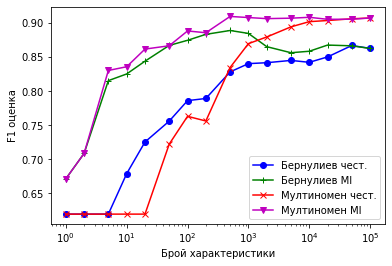

In [41]:
import matplotlib.pyplot as plt

plt.plot(x,yBF,'-bo')
plt.plot(x,yBM,'-g+')
plt.plot(x,yMF,'-rx')
plt.plot(x,yMM,'-mv')
plt.ylabel('F1 оценка')
plt.xlabel('Брой характеристики')
plt.xscale("log")
plt.legend(['Бернулиев чест.','Бернулиев MI','Мултиномен чест.','Мултиномен MI'])
plt.show()

##### От тук следват новите функции за визуализиране на Линеен класификатор

In [42]:
cEco = classes.index('E-Economy')
cMil = classes.index('S-Military')
cCult = classes.index('C-Culture')
cPol = classes.index('J-Politics')

In [43]:
testClassCorpusE = [testClassCorpus[cEco], testClassCorpus[cMil] ]
trainClassCorpusE = [trainClassCorpus[cEco], trainClassCorpus[cMil] ];testClassCorpusE

[[['Европейската', 'комисия', 'отправи', 'нападки', ...],
  ['ЕК', 'откри', 'процедура', 'срещу', 'Румъния', ...],
  ['Седмият', 'икономически', 'форум', 'за', 'ЮИЕ', 'бе', ...],
  ['Олимпийското', 'вълнение', 'расте', 'на', 'фона', ...],
  ['Гърция', 'затяга', 'коланите', 'заради', 'строгите', ...],
  ['Икономиката', 'е', 'в', 'центъра', 'на', ...],
  ['Бъсеску', 'призова', 'румънските', 'политици', 'да', ...],
  ['Икономически', 'преглед', '17', '/', '01', '/', ...],
  ['България', 'и', 'Молдова', 'се', 'стремят', 'към', ...],
  ['Сърбия', ',', 'Хърватия', 'и', 'Словения', 'ще', ...],
  ['Сръбски', 'депутат', 'е', 'разследван', 'по', ...],
  ['Гръцкият', 'финансов', 'министър', 'обеща', 'да', ...],
  ['По', '-', 'малкият', 'външен', 'дълг', 'подобри', ...],
  ['Според', 'представител', 'на', 'ЕК', 'статутът', ...],
  ['Cмяната', 'на', 'правителството', 'е', 'резултат', ...],
  ['Македонската', 'икономика', 'е', 'на', 'челно', ...],
  ['Инцко', 'призова', 'за', 'икономически', 'реформ

In [44]:
condProbBE, priorBE, VBE = trainBernoulliNB(trainClassCorpusE)

[                                                  --------------------------------------------------]


In [45]:
condProbME, priorME, VME = trainMultinomialNB(trainClassCorpusE)

[                                                  --------------------------------------------------]


In [46]:
NcE = [ len(classList) for classList in trainClassCorpusE ];NcE

[587, 1428]

In [47]:
gamma = lambda text : applyMultinomialNB(priorME, condProbME, text)
confusionMatrix, precision, recall, Fscore, P, R, F1 = testClassifier(testClassCorpusE, gamma)

[                                                  -------------------------------------------------------]


In [48]:
print('Матрица на обърквания: ')
for row in confusionMatrix:
    for val in row:
        print('{:4}'.format(val), end = '')
    print()
print('Прецизност: '+str(precision))
print('Обхват: '+str(recall))
print('F-оценка: '+str(Fscore))
print('Обща презизност: '+str(P)+', обхват: '+str(R)+', F-оценка: '+str(F1))
print()

Матрица на обърквания: 
  60   5
   4 154
Прецизност: [0.9375, 0.9685534591194969]
Обхват: [0.9230769230769231, 0.9746835443037974]
F-оценка: [0.9302325581395349, 0.9716088328075709]
Обща презизност: 0.959502002425473, обхват: 0.9596412556053812, F-оценка: 0.9595716239633164



In [49]:
featureSetE = selectFeaturesByMI(NcE,VBE,2);featureSetE

{'банка', 'военни'}

In [50]:
gamma = lambda text : applyMultinomialNB(priorME, condProbME, text, featureSetE)
confusionMatrix, precision, recall, Fscore, P, R, F1 = testClassifier(testClassCorpusE, gamma)

[                                                  -------------------------------------------------------]


In [51]:
print('Матрица на обърквания: ')
for row in confusionMatrix:
    for val in row:
        print('{:4}'.format(val), end = '')
    print()
print('Прецизност: '+str(precision))
print('Обхват: '+str(recall))
print('F-оценка: '+str(Fscore))
print('Обща презизност: '+str(P)+', обхват: '+str(R)+', F-оценка: '+str(F1))
print()

Матрица на обърквания: 
  21  44
   0 158
Прецизност: [1.0, 0.7821782178217822]
Обхват: [0.3230769230769231, 1.0]
F-оценка: [0.48837209302325585, 0.8777777777777778]
Обща презизност: 0.8456688718199175, обхват: 0.8026905829596414, F-оценка: 0.8236194329382259



In [52]:
print('Features = '+str(featureSetE))

Features = {'банка', 'военни'}


In [53]:
featureListE = list(featureSetE);featureListE

['банка', 'военни']

In [54]:
priorME

[0.2913151364764268, 0.7086848635235732]

In [55]:
b = math.log(priorME[0] / priorME[1])
w = [ math.log(condProbME[feature][0] / condProbME[feature][1]) for feature in featureListE]
print('w='+str(w)+', b='+str(b))

w=[4.552242736403306, -3.8661647982848426], b=-0.8890053230714332


In [56]:
NcE

[587, 1428]

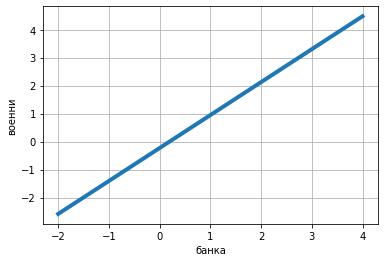

In [57]:
X = [*range(-2,5)]
Y = [ (-b - w[0] * x) / w[1] for x in X]
plt.plot(X,Y, linewidth=4)
plt.xlabel(featureListE[0])
plt.ylabel(featureListE[1])
plt.grid(True)
plt.show()

In [58]:
def createIndex(myCorpus, fileNames):
    pb = progressBar()
    pb.start(len(fileNames))
    dictionary={}
    for docID, fileName in enumerate(fileNames):
        pb.tick(docID)
        text = myCorpus.words(fileName)
        for token in text:
            if not token.isalpha(): continue
            term = token.lower()
            if term in dictionary:
                (postings, tf) = dictionary[term]
                if postings[-1] < docID:
                    postings.append(docID)
                    tf.append(1)
                else:
                    tf[-1] += 1
            else:
                dictionary[term] = ([docID],[1])
    pb.stop()
    N = len(fileNames)
    pb.start(len(dictionary))
    lengths = [0.0]*N
    t=0
    for term in dictionary:
        pb.tick(t)
        t += 1
        (postings, tf) = dictionary[term]
        df = len(postings)
        idf = math.log(N/df)
        for i, docID in enumerate(postings):
            w = math.log(1+tf[i]) * idf
            lengths[docID] += w ** 2
    for docID in range(N):
        lengths[docID] = math.sqrt(lengths[docID])
    pb.stop()
    return dictionary, lengths

In [59]:
dictionary, lengths = createIndex(myCorpus, fileNames)

[                                                  --------------------------------------------------]
[                                                  --------------------------------------------------]


In [65]:
dictionary['военни'][0][2]

211

In [66]:
dictionary['военни'][1][18]

8

In [67]:
' '.join(myCorpus.words(fileNames[664]))

'Ашдаун уволнява висши държавни служители и замразява банкови сметки с цел да прекрати подкрепата за Караджич 01 / 07 / 2004 Като част от широките мерки , предприети от върховния представител Пади Ашдаун с цел да се прекрати институционализираната подкрепа за лица , обвинени във военни престъпления в Република Сръбска , десетки висши държавни чиновници от босненските сърби загубиха работата си . От Бет Кампшрор за Southeast European Times от Сараево - 01 / 07 / 04 Председателят на парламента на Република Сръбска Драган Калинич бе един от 60 - те държавни служители , уволнени от върховния представител в БиХ Пади Ашдаун . [ АФП ] Главният международен представител в Босна и Херцеговина ( БиХ ) уволни 60 висши държавни чиновници от босненските сърби в сряда ( 30 юни ), защото не са оказвали сътрудничество на трибунала на ООН за военни престъпления в Хага , което е станало причина БиХ да не получи покана за по - тясно сътрудничество с НАТО . Този ход бе аплодиран в Сараево като отдавна нал

In [61]:
def cosineScore(query, K, dictionary, lengths):
    N = len(lengths)
    scores = {}
    for term in query:
        if term not in dictionary: continue
        (postings, tf) = dictionary[term]
        df_t = len(postings)
        idf_t = math.log(N/df_t)
        #        w_tq = idf_t
        w_tq = 1.0
        for i, docID in enumerate(postings):
            w_td = math.log(1+tf[i]) * idf_t
            if docID not in scores: scores[docID]=0.0
            scores[docID] += w_tq * w_td
    for docID in scores:
        scores[docID] = scores[docID] / lengths[docID]
    result = sorted([(docID,scores[docID]) for docID in scores], key = lambda x: x[1] , reverse=True)
    return result[:K]

In [79]:
printDocuments(myCorpus, fileNames, cosineScore(['световно', 'първенство', 'по', 'футбол'], 5, dictionary, lengths))

Document ID: 31104 Score: 0.45938644151362595
Словения извоюва историческа победа в мач за Световната купа 14 / 06 / 2010 КЕЙПТАУН , ЮАР -- Словения отбеляза в неделя ( 13 юни ) първата си победа на световно първенство по футбол , като победи Алжир с 1 : 0 . Голът бе дело на капитана на словенския отбор , Роберт Корен , в 79 - ата минута . Другият мач от Група C , между Англия и Съединените щати , завърши с равенство 1 : 1 , което даде на Словения преднина в групата . Словения играе срещу САЩ в петък . ( AФП , АП , Уебсайт на ФИФА - 13 / 06 / 10 ) 

Document ID: 16138 Score: 0.4032271663021162
ФИФА критикува Албания за изстъпления на фенове 10 / 03 / 2005 ЛОНДОН , Великобритания -- ФИФА , световната федерация по футбол , отсъди в сряда ( 9 март ) Албания да заплати глоба от 40000 швейцарски франка и да играе следващите си два домакински мача от квалификациите за световно първенство пред празни трибуни . Решението бе взето в отговор на грозните сцени по време на мача срещу Украйна в Тир

In [80]:
printDocuments(myCorpus, fileNames, cosineScore(['румъния','вирус'], 5, dictionary, lengths))

Document ID: 31655 Score: 0.3676287454776024
Потвърдено е наличието на рядък вирус в Гърция 10 / 08 / 2010 АТИНА , Гърция -- Здравните власти потвърдиха в понеделник ( 9 август ), че 16 души са се заразили със западнонилски вирус , а трима от тях са починали . Много хора , заразени със западнонилския вирус , който обикновено се пренася от комари , изобщо не се разболяват , но някои развиват смъртоносен менингит и енцефалит . ( АП , АНА - МПА - 09 / 08 / 10 ) 

Document ID: 31756 Score: 0.36378084454958454
Западнонилският вирус причини смъртта на още трима души в Гърция 20 / 08 / 2010 АТИНА , Гърция -- Общо седем са вече смъртните случаи от западнонилския вирус , след като още трима възрастни хора починаха от възпаление на мозъка , съобщиха здравните власти в четвъртък ( 19 август ). За други 77 души в Централна и Северна Гърция е установено , че са заразени с вируса . Западнонилският вирус се разпространява от комари . ( AП , ИТАР - ТАСС - 19 / 08 / 10 ) 

Document ID: 31878 Score: 0.3

In [70]:
cosineScore(['румъния','вирус'], 5, dictionary, lengths)

[(31655, 0.3676287454776024),
 (31756, 0.36378084454958454),
 (31878, 0.3572283265174734),
 (31634, 0.3225883261411342),
 (17690, 0.2695464993550481)]